[![img/pythonista.png](img/pythonista.png)](https://www.pythonista.io)

# *Javascript* asíncrono.

*Javascript* es un lenguaje dirigido por eventos (*event driven*). Es decir, que es posible ejecutar código de *Javascript* a partir de la ocurrencia de un evento. En la mayoría de los casos, el código de *Javascript* no se ejecuta de manera secuencial.

Del mismo modo, *Javascript* interpreta y ejecuta cada expresión en el código ingresado de inmediato sin esperar a que termine la expresión previa.

**Ejemplo:**

* A continuación se ejecutará un *script* en el que uno de los elementos utilizará la función ```setTimeOut()``` para ejecutarse después de un tiempo determinado.
* El resultado es que los párrafos con los textos ```Primero``` y ```Tercero``` se desplieguen antes que el párrafo ```Segundo```.

In [ ]:
%%html
<div id="Contenedor-1"></div>

In [ ]:
%%javascript

// Selecciona el elemento de la celda superior
const div = document.getElementById("Contenedor-1");

// Función para añadir un párrafo al contenedor
let suma_parrafo = function(obj, texto){
    let par = document.createElement('p');
    par.textContent = texto;
    obj.appendChild(par);
}
  
// Añade un párrafo
suma_parrafo(div, "Primero");

// Añade un párrafo después de 5 segundos
let imprimeSegundo = setTimeout(() => {
    suma_parrafo(div, "Segundo");
        }, 5000);

//Añade un párrafo
suma_parrafo(div, "Tercero");

## Las *callbacks*.

Se entiende por "*callback*" a una función que será llamada en un momento determinado. Una *callback* se invoca sólo por su nombre. Sin paréntesis ni argumentos.

https://developer.mozilla.org/es/docs/Glossary/Callback_function

### El *callback hell*.

Debido a la naturaleza de *Javascript* es común que se desencadenen procesos en la ejecución del código aún cuando un proceso previo que debería de tener precedencia aún no termina. Incluso es posible que los procesos de ejecución presenten diversos estados y que estos estados deban de ser tratados de forma diferente en cada caso.

Antes de la publicación de *EcmaScript 6*, el tratamiento de estados intermedios y fallidos de una ejecución resultaba en estructuras de código complicadas y redundantes, con muchos condicionales anidados. A esto se le conoce como *callback hell*.

http://callbackhell.com/

## Objetos ```Promise```.

Los objetos ```Promise``` o simplemente *promises*, permiten crear procesos pueden adquirir ciertos estados y es posible realizar llamadas a un *callback* particular en función de cada estado.

Por lo general los objetos ```Promise``` corresponden a eventos o procesos cuya ocurrencia, estado y/o éxito son inciertos. 

Los objetos ```Promise``` identifican 4 estados.

* ```pending``` es el estado que tiene un proceso que se esta ejecutando.
* ```fulfilled``` es el estado que tiene un proceso cuando finaliza de forma exitosa.
* ```rejected``` es le estado que tien un proceso cuando falla.
* ```settled``` es el estado final de un proceso ya sea exitoso o fallido.

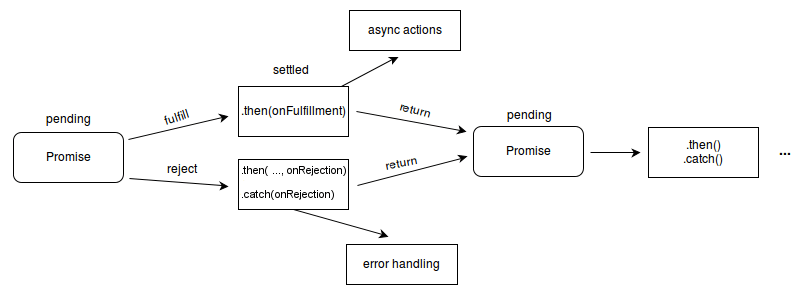

https://developer.mozilla.org/es/docs/Web/JavaScript/Reference/Global_Objects/Promise

## Definición de objetos ```Promise```.

Los objetos ```Promise``` se instancian de la siguiente forma:

```
new Promise((resolve, reject) => {<funcion>})
```

Donde:

* ```resolve``` es una palabra clave de *Javascript* que se utiliza para establecer que el objeto ha adquirido el estado ```"fulfilled"```.
* ```reject``` es una palabra clave de *Javascript* que se utiliza ppara establecer que el objeto ha adquirido el estado  ```"rejected"```.

### Uso de ```resolve``` dentro de un objeto ```Promise```.

```
new Promise((resolve) => {
    ...
    ...
    resolve(<argumento>)
    }
```    
Una vez que se define el estado ```"fulfilled"```, es posible invocar una *callback* a la que se le ingresarían los argumentos ingresados en ```resolve```.

### Uso de ```reject``` dentro de un objeto ```Promise```.

```
new Promise((reject) => {
    ...
    ...
    reject(<argumento>)
    }
```    
Una vez que se define el estado ```"rejected"```, es posible invocar una *callback* a la que se le ingresarían los argumentos ingresados en ```reject```.

## Métodos de control de flujo.

* [```Promise.prototype.then()```](https://developer.mozilla.org/es/docs/Web/JavaScript/Reference/Global_Objects/Promise/then)
* [```Promise.prototype.catch()```](https://developer.mozilla.org/es/docs/Web/JavaScript/Reference/Global_Objects/Promise/catch)
* [```Promise.prototype.finally()```](https://developer.mozilla.org/es/docs/Web/JavaScript/Reference/Global_Objects/Promise/finally)

```
<promesa>.then(<callback 1>).catch(<callback 2>).finally(<callback 3>)
```

Donde:

* ```<callback n>```es el nombre de una *callback* que se ejecutará con los argumentos definidos con ```reject``` o ```resolve```, según sea el caso.

El resultado de cada uno de estos métodos es otro objeto ```Promise```, por lo que es posible concatenarlos.

**Ejemplo:**

* Las siguientes celdas evaluarán a la variable ```valor``` dentro de un objeto ```Promise``` llamado ```promesa```.
    * En caso de que ```valor``` sea ```true```, su estado será ```"fulfilled"```.
    * En caso de que ```valor``` sea ```false```, su estado será ```"rejected"```.
    * se implementarán los métodos ```Promise.prototype.catch()```, ```Promise.prototype.then()``` y ```Promise.prototype.finally()``` para gestionar cada estado.
        * En caso de que el estado del objeto sea ```fulfilled```, se desplegará un párrafo con el mensaje ```¡YAY!```.
        * En caso de que el estado del objeto sea ```rejected```, se desplegará un párrafo con el mensaje ```¡Oh, rayos!```.
        * Independientemente del estado del objeto se, se desplegará un párrafo final despelganod el valor de ```valor```.
    * Se desplegará en la consola del navegador el objeto ```Promise``` resultante.

In [ ]:
%%html
<div id="Contenedor-2"></div>

In [ ]:
%%javascript

// Selecciona el elemento de la celda superior
const div = document.getElementById("Contenedor-2");

// Función para añadir un párrafo al contenedor
function suma_parrafo(texto){
    let par = document.createElement('p');
    par.textContent = texto;
    div.appendChild(par);
    }

const valor = false;

/* Define una Promise que tendrá estado "fulfilled" si valor es "true"
   y un estado "rejected" en caso de que valor sea "false: 
   invocará una callback en función del estado */
let promesa = new Promise((resolve, reject) => {
    valor ? resolve("¡YAY!"): reject("¡Oh, rayos!")})

promesa.then(suma_parrafo). // se ejecuta si el estado es "fulfilled"
    catch(suma_parrafo). // se ejecuta si el estado es "rejected"
    finally(() => {suma_parrafo('El valor es: ' + valor)}); // se ejecuta al teminar la ejecución

let resultado = promesa;
console.log(resultado);

### Ejemplo de un objeto ```Promise``` con retraso.

La función ```setTimeout()``` permite ejecutar una función después de un intervalo de tiempo definido.

```
setTimeout(<func>, <lapso>);
```

Donde:

* ```<func>``` es una función.
* ```<lapso>``` es el lapso de tiempo de espera expresado en milisegundos.

https://developer.mozilla.org/es/docs/Web/API/setTimeout

**Ejemplo:**

* En la siguiente celda se creará un objeto ```Promise``` que tardará 5 segundos en realizar su ejecución.
* El comportamiento de *Javascript* hará que los párrafos con los textos ```Primero``` y ```Tercero``` se desplieguen antes que el párrafo ```Segundo```.

In [1]:
%%html
<div id="Contenedor-3"></div>

In [ ]:
%%javascript

// Selecciona el elemento de la celda superior
const div = document.getElementById("Contenedor-3");

// Función para añadir un párrafo al contenedor
function suma_parrafo(texto){
    let par = document.createElement('p');
    par.textContent = texto;
    div.appendChild(par);
    }

/* Define una Promise en la que después de 5 segundos 
   invocará una callback ingresando "Segundo" como argumento. */ 
let espera_segundo = new Promise((resolve) => {
        setTimeout(() => resolve("Segundo"), 5000);
    })

suma_parrafo("Primero");
espera_segundo.then(suma_parrafo);
console.log(espera_segundo);
suma_parrafo("Tercero");

## Funciones asíncronas con ```async``` y ```await```.

A partir de *EcmaScript 6* es posible definir funciones asíncronas que permitan detener la ejecución lógica del código que contiene mientras espera por la finalización de un objeto ```Promise```.

```
async function <func>(){
    ... 
    ...
    await <promise>
    ...
    ...}
```

* ```async``` le indica a *Javascipt* que la función es asíncrona.
* ```await``` indica que el flujo de ejecución de la función debe detenerse hasta que termine de ejecutarse la promesa que se encuentra en la expresión contigua.

**Ejemplo:**

* La siguiente celda ejecutará la función ```despliega_tercero()``` y dentendrá su ejecución hasta que el objeto ```Promise``` finalice.
* El resultado es que se deplegarán todos los párrafos en orden.

In [ ]:
%%html
<div id="Contenedor-4"></div>

In [ ]:
%%javascript

// Selecciona el elemento de la celda superior
const div = document.getElementById("Contenedor-4");

// Función para añadir un párrafo al contenedor
function suma_parrafo(texto){
    let par = document.createElement('p');
    par.textContent = texto;
    div.appendChild(par);
    }


// Define una función que espera hasta que la Promise concluya 
async function despliega_tercero(){
    suma_parrafo("Primero");
    suma_parrafo(await new Promise((resolve) => resolve("Segundo")));
    suma_parrafo("Tercero");
}

despliega_tercero();

* La siguiente celda ejecutará la función ```despliega_tercero()``` y dentendrá su ejecución hasta que el objeto ```Promise``` finalice después de 5 segundos.
* El resultado es que se deplegarán todos los párrafos en orden, pero los párrafos ```Segundo```y ```Tercero``` se desplegarán 5 segundos después de iniciar la ejecución.

In [ ]:
%%html
<div id="Contenedor-5"></div>

In [ ]:
%%javascript

// Selecciona el elemento de la celda superior
const div = document.getElementById("Contenedor-5");

// Función para añadir un párrafo al contenedor
function suma_parrafo(texto){
    let par = document.createElement('p');
    par.textContent = texto;
    div.appendChild(par);
    }

/* Define una Promise en la que después de 5 segundos 
   invocará una callback ingresando "Segundo" como argumento. */
let espera_segundo = new Promise((resolve) => {
        setTimeout(() => resolve("Segundo"), 5000);
    })

// Define una función que espera hasta que la Promise concluya 
async function despliega_tercero(){
    suma_parrafo("Primero");
    await espera_segundo.then(suma_parrafo);
    console.log(espera_segundo);
    suma_parrafo("Tercero");
}

despliega_tercero();

**Ejemplo:**

In [ ]:
%%html
<div id="Contenedor-6"></div>

* En la siguiente celda se define la función ```sleep()```, la cual detendrá la ejecución de la función asíncrona ```ordenado()``` durante el tiempo ingresado como argumento.

In [ ]:
%%javascript

/* Define una Promise en la que después de 5 segundos 
   invocará una callback ingresando "Segundo" como argumento. */


// Selecciona el elemento de la celda superior
const div = document.getElementById("Contenedor-6");


// Función para añadir un párrafo al contenedor
function suma_parrafo(texto){
    let par = document.createElement('p');
    par.textContent = texto;
    div.appendChild(par);
    }

function sleep(delay){
    return new Promise((resolve) => {
        setTimeout(() => resolve(true), delay)})
    }

async function ordenado() {
        suma_parrafo("Primero");
        let duerme = await sleep(3000);
        console.log(duerme);
        suma_parrafo("Segundo");
        duerme = await sleep(2000);
        suma_parrafo("Tercero");
}
                              
ordenado();                             

<p style="text-align: center"><a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.</p>
<p style="text-align: center">&copy; José Luis Chiquete Valdivieso. 2022.</p>